# SVM using SGD with RFF

## Testing the RBF Kernel Approximation

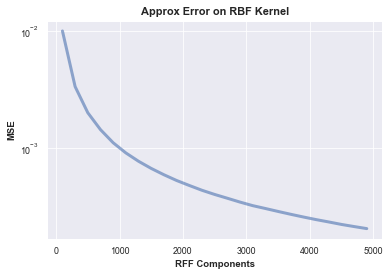

In [6]:
## Dataset tiny
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from RFF import * 
from sklearn.metrics.pairwise import rbf_kernel

sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

# Tiny 
X = np.random.randn(1000, 200)

n_comp = np.arange(100, 5000, 200)
rbf = rbf_kernel(X, gamma = 2)
errors = []

for comp in n_comp:
    rff = RFF(n_components = comp, sigma = 2)
    rff.fit(X)
    kernel = rff.kernel(X)

    errors.append(((kernel - rbf) ** 2).mean())

plt.figure()
plt.title("Approx Error on RBF Kernel", fontweight="bold", fontsize=11)
plt.plot(n_comp, errors, lw=3, alpha=0.6)
plt.xlabel("RFF Components", fontweight="bold"); plt.ylabel("MSE", fontweight="bold")
plt.yscale("log")
plt.show()


## Hyperparameter Search -- Tiny

In [24]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from DataUtils import *
from RFF import *
from itertools import product

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

lrs = [0.1, 0.5, 1, 3, 5]; Cs = [0.001, 0.01, 0.1, 0.5]
batch_sizes = [10, 20, 30, 40]; n_comps = [100, 250, 400]
n_sigma = [0.33, 0.66, 1]

results = {}
for n_comp, sigma in tqdm(product(n_comps, n_sigma), total=9):
    rff = RFF(n_components=n_comp, sigma=sigma)
    rff.fit(xtrain)
    new_train = rff.transform(xtrain)
    for lr in tqdm(lrs):
        for C in Cs:
            for batch in batch_sizes:
                svm = LinearSVM(lr=lr, C=C, batch_size=batch)
                results[f'lr:{lr}, C:{C}, batch:{batch}, n_comp:{n_comp}, sigma:{sigma}'] = DataUtils.cross_validation_score(svm, new_train, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

100%|██████████| 9/9 [02:17<00:00, 15.24s/it]

 Best parameters and their resulting classification accuracy:
[('lr:3, C:0.01, batch:10, n_comp:100, sigma:0.66', 1.0),
 ('lr:3, C:0.01, batch:10, n_comp:100, sigma:1', 1.0),
 ('lr:3, C:0.001, batch:10, n_comp:250, sigma:0.66', 1.0),
 ('lr:5, C:0.01, batch:20, n_comp:250, sigma:0.66', 1.0),
 ('lr:5, C:0.01, batch:10, n_comp:400, sigma:0.33', 1.0)]



## Classification accuracy and convergence plot

Trainig runtime: 0.03 s


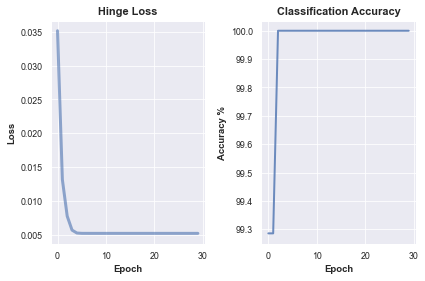


Classification accuracy evaluated on test set with computed weights: 100.0 %



In [30]:
from DataLoader import *
from LinearSVM import *
from RFF import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()
rff = RFF(n_components=100, sigma=1)
rff.fit(xtrain)
new_train, new_test = rff.transform(xtrain), rff.transform(xtest)

# best hyperparameters
lr = 3; C = 0.01; batch_size=10
svm = LinearSVM(lr=lr, C=C, batch_size=batch_size)
svm.fit(new_train, ytrain)
print(f"Trainig runtime: {round(svm.runtime, 2)} s")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
#plt.ylim(min(svm.accuracies), 105)

plt.tight_layout()
plt.show()

# classification accuracy
print("\nClassification accuracy evaluated on test set with computed weights:", end=" ")
print(round(svm.accuracy(np.c_[new_test, np.ones(new_test.shape[0])], ytest), 2)*100, "%\n")

## Hyperparameter Search -- Large

In [31]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from DataUtils import *
from RFF import *
from itertools import product

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

lrs = [0.1, 0.5, 1, 3, 5]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [50, 100, 200]; n_comps = [100, 250, 400]
n_sigma = [0.33, 0.66, 1]
results = {}

for n_comp, sigma in tqdm(product(n_comps, n_sigma), total=9):
    rff = RFF(n_components=n_comp, sigma=sigma)
    rff.fit(xtrain)
    new_train = rff.transform(xtrain)
    for lr in tqdm(lrs):
        for C in Cs:
            for batch in batch_sizes:
                svm = LinearSVM(lr=lr, C=C, batch_size=batch, max_iters=3)
                results[f'lr:{lr}, C:{C}, batch:{batch}, n_comp:{n_comp}, sigma:{sigma}'] = DataUtils.cross_validation_score(svm, new_train, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

100%|██████████| 9/9 [1:24:15<00:00, 561.77s/it]

 Best parameters and their resulting classification accuracy:
[('lr:0.1, C:0.001, batch:50, n_comp:250, sigma:1', 1.0),
 ('lr:0.1, C:0.01, batch:50, n_comp:250, sigma:1', 1.0),
 ('lr:0.5, C:0.001, batch:50, n_comp:250, sigma:1', 1.0),
 ('lr:0.5, C:0.001, batch:100, n_comp:250, sigma:1', 1.0),
 ('lr:0.5, C:0.001, batch:200, n_comp:250, sigma:1', 1.0)]



## Classification accuracy and convergence plot

100%|██████████| 10/10 [00:07<00:00,  1.35it/s]
Runtime: 7.41 s


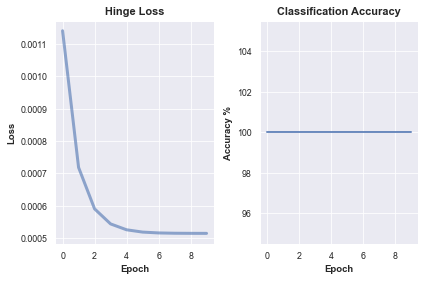


Classification accuracy evaluated on test set with computed weights: 100.0 %



In [32]:
from DataLoader import *
from LinearSVM import *
from RFF import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()
rff = RFF(n_components=250, sigma=1)
rff.fit(xtrain)
new_train, new_test = rff.transform(xtrain), rff.transform(xtest)

# best hyperparameters
lr = 0.1; C = 0.001; batch_size=50
svm = LinearSVM(lr=lr, C=C, batch_size=batch_size, max_iters=10, tqdm_toggle=True)
svm.fit(new_train, ytrain)
print(f"Runtime: {round(svm.runtime, 2)} s")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
#plt.ylim(min(svm.accuracies), 105)

plt.tight_layout()
plt.show()

# classification accuracy
print("\nClassification accuracy evaluated on test set with computed weights:", end=" ")
print(round(svm.accuracy(np.c_[new_test, np.ones(new_test.shape[0])], ytest), 2)*100, "%\n")

## Hyperparameter Search -- MNIST

In [4]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
from RFF import *
from itertools import product

from pprint import pprint 

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

# split 10.000 samples off xtrain and do hyperparameter-search using this validation set
indices = np.random.permutation(len(ytrain))
xtrain = xtrain[indices]
ytrain = ytrain[indices]

x_val = xtrain[:10**4]; y_val = ytrain[:10**4]
xtrain = xtrain[10**4:]; ytrain = ytrain[10**4:]

lrs = [0.01, 0.1, 0.5, 1, 3]; Cs = [0.1, 1, 10]
batch_sizes = [100, 200, 300]; n_comps = [200, 400, 600]
n_sigma = [15, 20, 25]
results = {}

for n_comp, sigma in tqdm(product(n_comps, n_sigma), total=9):
    rff = RFF(n_components=n_comp, sigma=sigma)
    rff.fit(xtrain)
    new_train = rff.transform(xtrain)
    new_val = rff.transform(x_val)

    for lr in tqdm(lrs):
        for C in Cs:
            for batch in batch_sizes:
                mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch, max_iters=1)
                mc_svm.fit(new_train, ytrain)
                results[f'lr:{lr}, C:{C}, batch:{batch}, n_comp:{n_comp}, sigma:{sigma}'] = mc_svm.accuracy(np.c_[new_val, np.ones(new_val.shape[0])], y_val)

results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

100%|██████████| 9/9 [3:47:30<00:00, 1516.69s/it]

 Best parameters and their resulting classification accuracy:
[('lr:3, C:1, batch:100, n_comp:600, sigma:20', 0.875),
 ('lr:3, C:10, batch:100, n_comp:600, sigma:20', 0.8747),
 ('lr:3, C:10, batch:100, n_comp:600, sigma:25', 0.8739),
 ('lr:3, C:0.1, batch:100, n_comp:400, sigma:25', 0.8734),
 ('lr:3, C:1, batch:100, n_comp:400, sigma:25', 0.8727)]



## Classification accuracy and convergence plot

100%|██████████| 4/4 [02:38<00:00, 39.56s/it]
Runtime: 158.25 s


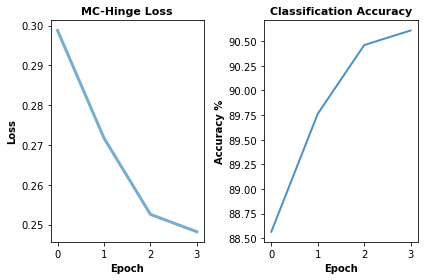


Classification accuracy evaluated on test set: 90.31 %
Accuracy with sklearn: 91.12%


In [5]:
from MultiClassSVM import *
from RFF import *
import matplotlib.pyplot as plt 
from DataLoader import *
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier



dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()
rff = RFF(n_components=600, sigma=20)
rff.fit(xtrain)
new_train, new_test = rff.transform(xtrain), rff.transform(xtest)

# best hyperparameters
lr = 3; C = 1; batch_size=100
mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch_size, max_iters=4, tqdm_toggle=True)
mc_svm.fit(new_train, ytrain)
print(f"Runtime: {round(mc_svm.runtime, 2)} s")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("MC-Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(mc_svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(mc_svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")

plt.tight_layout()
plt.show()

# classification accuracy
print("\nClassification accuracy evaluated on test set:", end=" ")
print(round(mc_svm.accuracy(np.c_[new_test, np.ones(new_test.shape[0])], ytest), 5)*100, "%")

# sanity check with sklearn
svc = OneVsRestClassifier(LinearSVC(C=C))
svc.fit(new_train, ytrain)
pred = svc.predict(new_test)

print(f'Accuracy with sklearn: {np.mean(pred == ytest) * 100:.2f}%')